# Module 5 Section 1 Lab 1 - Decision Tree
Tujuan utama algoritma *Decision Tree* adalah untuk mengidentifikasi variabel dan target yang dapat memberikan distribusi homogen dengan mengacu pada variabel target. Distribusi homogen berarti bahwa nilai-nilai yang sama dari variabel target dikelompokkan bersama sehingga keputusan konkret dapat dibuat.​

Homogenitas berarti lebih banyak hal serupa bersama-sama atau, dengan kata lain, lebih sedikit hal-hal yang berbeda bersama-sama.​

Dengan membuat semakin homogen, maka dapat diidentifikasi sebagai keputusan konkret dalam algoritma *Decision Tree*. Mengidentifikasi variabel yang menghasilkan klasifikasi homogen terbaik dapat dilakukan dengan banyak cara. Ada beberapa algoritma yang tersedia untuk melakukan ini.

## Objektif
- Decision Tree Classification
- Entropy and Information Gain
- Gini Impurity
- Decision Tree Regression

# Decision Tree Classification

Kita akan menggunakan dataset Iris untuk melakukan klasifikasi dengan *Decision Tree*.

Creator: R.A. Fisher<br>
Date: July, 1988 

https://archive.ics.uci.edu/ml/datasets/iris 

Kumpulan data berisi 3 kelas masing-masing 50 instance, di mana setiap kelas mengacu pada jenis tanaman iris. Satu kelas dapat dipisahkan secara linier dari 2 kelas lainnya; yang terakhir tidak dapat dipisahkan secara linier satu sama lain.

<img src='https://raw.githubusercontent.com/ksnugroho/machine-learning/master/Iris%20Dataset.png' width='800'></img>

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
features = pd.DataFrame(iris.data)
labels = pd.DataFrame(iris.target)

In [6]:
features.shape, labels.shape

((150, 4), (150, 1))

In [2]:
print(features)
print(labels)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
     0
0    0
1    0
2    0
3    0
4    0
..  ..
145  2
146  2
147  2
148  2
149  2

[150 rows x 1 columns]


In [3]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.4, random_state=0)

print(features.shape)
print(labels.shape)

(150, 4)
(150, 1)


In [7]:
'''
Parameter 'criterion' digunakan untuk mengukur kualitas sebuah split.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
'''
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2]


In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels_test, pred)
print(accuracy)

0.95


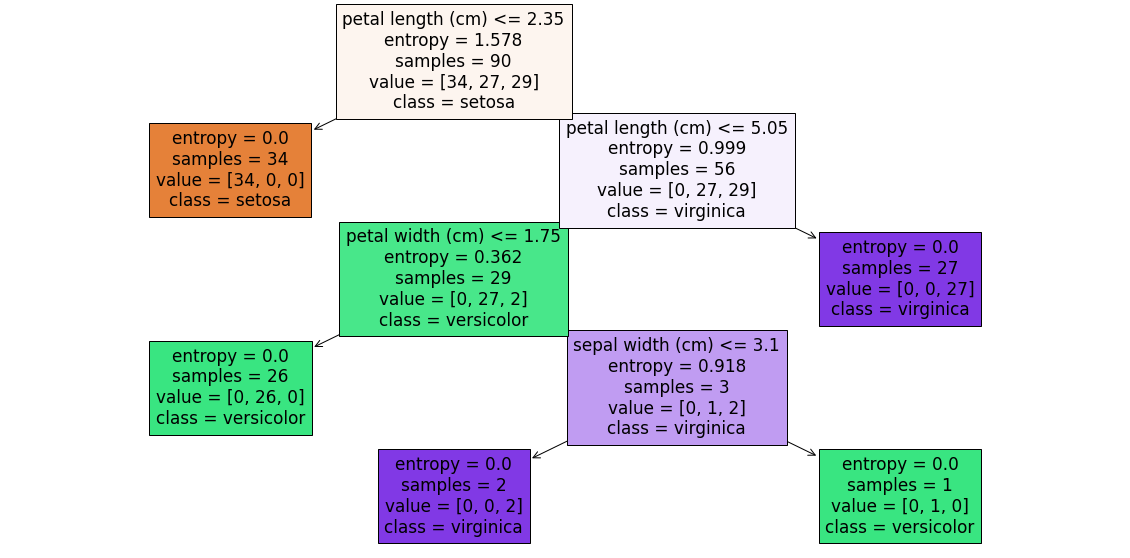

In [9]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)
plt.show()

## Entropy and Information Gain
**Entropy** digunakan untuk mengukur ketidakmurnian atau keacakan data. Bayangkan kita memilih bola kuning dari kotak yang hanya berisi bola kuning (misalnya 100 bola kuning). Kemudian kotak ini dikatakan memiliki 0 entropi yang menyiratkan 0 kemurnian total.

**Information Gain** digunakan untuk menemukan fitur terbaik yang berfungsi sebagai simpul akar dalam hal perolehan informasi, pertama-tama kita menggunakan setiap fitur dan membagi kumpulan data di sepanjang nilai fitur ini, lalu menghitung entropi pada data.

> Fitur dengan nilai *Information Gain* terbesar harus digunakan sebagai simpul akar untuk mulai membangun pohon keputusan. Algoritma ID3 menggunakan *Information Gain* untuk membangun pohon keputusan.

## Gini Impurity
**Gini Index:** dihitung dengan mengurangi jumlah probabilitas kuadrat dari setiap kelas dari satu. *Gini Index* melakukan partisi yang lebih besar dan mudah diimplementasikan sedangkan *Information Gain* melakukan partisi yang lebih kecil dengan nilai yang berbeda.

> Fitur dengan nilai *Gini Index* yang lebih rendah dipilih untuk pemisahan. Algoritma CART menggunakan *Gini Index* untuk membangun pohon keputusan.



# Decesion Tree Regression

*Decision Tree Regression* mengamati fitur suatu objek dan melatih model dalam struktur pohon untuk memprediksi data di masa depan untuk menghasilkan keluaran berkelanjutan. Output berkelanjutan berarti bahwa output tidak diskrit, yaitu, tidak diwakili hanya oleh kumpulan angka atau nilai yang diketahui dan diskrit.

In [22]:
dataset = pd.read_csv('dataset/ice_cream_data.csv')
dataset.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [23]:
X = dataset['Temperature'].values
y = dataset['Revenue'].values

In [24]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.05, random_state=0)

In [25]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
'''

from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor() 
regressor.fit(features_train.reshape(-1,1), labels_train.reshape(-1,1))

DecisionTreeRegressor()

In [27]:
y_pred = regressor.predict(features_test.reshape(-1,1))

In [30]:
result = pd.DataFrame({'Real Values':labels_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

result.sample(10)

,Real Values,Predicted Values
13,350.629036,362.515216
20,395.273750,383.956240
3,449.813300,475.213354
22,288.158145,278.731962
9,493.710333,458.860905
7,581.074005,643.648601
12,644.488633,654.197406
21,572.537048,621.969209
4,636.298374,641.025389
2,662.558990,641.025389


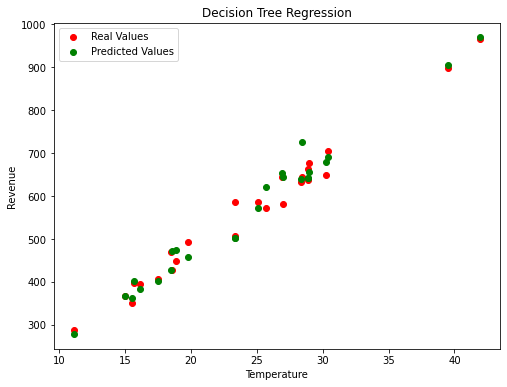

In [37]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.figure(figsize=(8,6))
plt.scatter(features_test, labels_test, color = 'red')
plt.scatter(features_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.legend(labels=['Real Values', 'Predicted Values'], loc='best')
plt.show()

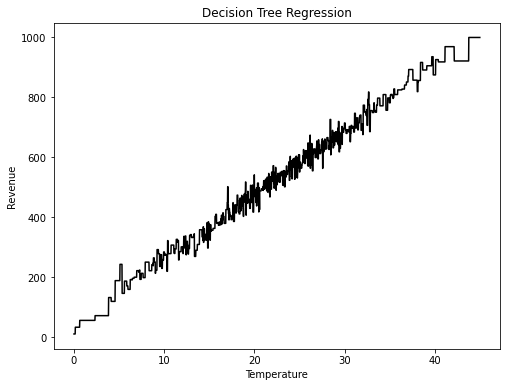

In [38]:
plt.figure(figsize=(8,6))
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()